In [41]:
#reading file and storing data into dataframe
import pandas as pd
fraudCheckData = pd.read_csv('Fraud_check.csv')
fraudCheckData

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [42]:
#Renaming columns and removing '.' from column names which can create problems in further processing
fraudCheckData=fraudCheckData.rename(columns={'Marital.Status':'maritalStatus','Taxable.Income':'taxableIncome','City.Population':'cityPopulation','Work.Experience':'workExperience'})

In [43]:
#mapping non numeric data into numeric 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
fraudCheckData['Undergrad']= label_encoder.fit_transform(fraudCheckData['Undergrad']) 

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
fraudCheckData['maritalStatus']= label_encoder.fit_transform(fraudCheckData['maritalStatus'])

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
fraudCheckData['Urban']= label_encoder.fit_transform(fraudCheckData['Urban'])

In [44]:
#Checking max value to identify bins for transforming into categorical data
fraudCheckData["taxableIncome"].max()

99619

In [45]:
#creating new column fraudVulnerability that contains labels(Y)
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
fraudCheckData["fraudVulnerability"]=pd.cut(fraudCheckData.taxableIncome,bins=[0,30000,100000],labels=["Risky","Good"])

In [46]:
#Inputs to decision tree
X=fraudCheckData.iloc[:,0:6]
X

,Undergrad,maritalStatus,taxableIncome,cityPopulation,workExperience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [47]:
#Labels
Y=fraudCheckData.iloc[:,6:7]
Y

,fraudVulnerability
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [48]:
#Checking null values in X
X.isnull().sum()

Undergrad         0
maritalStatus     0
taxableIncome     0
cityPopulation    0
workExperience    0
Urban             0
dtype: int64

In [49]:
#Checking null values in Y
Y.isnull().sum()

fraudVulnerability    0
dtype: int64

In [50]:
#Splitting data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2)

In [51]:
#Building decision tree model using gini coefficient method
from sklearn.tree import  DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

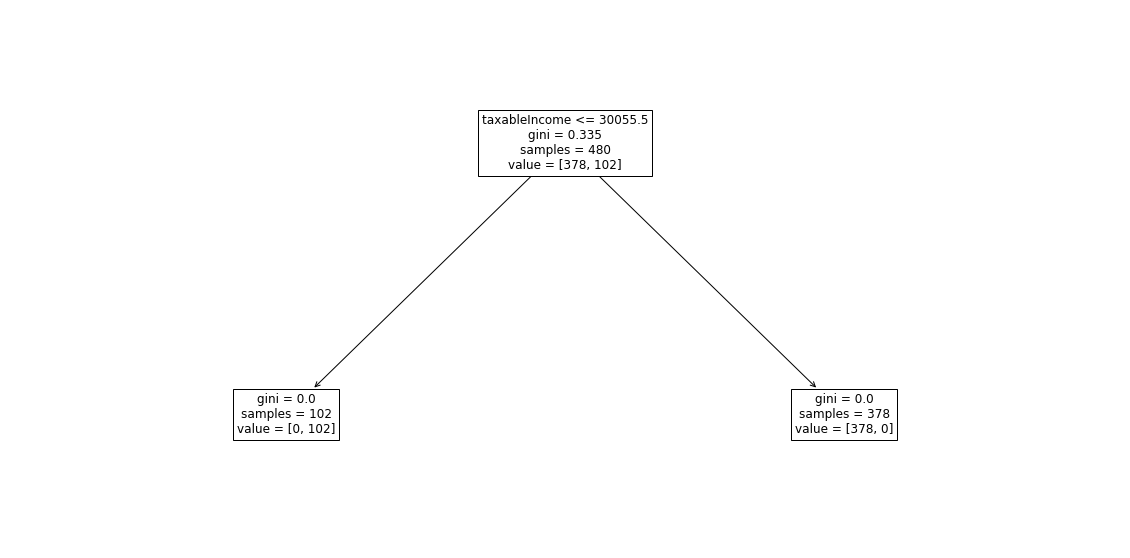

In [52]:
#Plotting tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model_gini, fontsize=12, feature_names=('Undergrad', 'maritalStatus', 'taxableIncome', 'cityPopulation','workExperience', 'Urban'));

In [53]:
model_gini.score(x_test,y_test)

1.0

In [54]:
#Building decision tree model using entropy method
from sklearn.tree import  DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

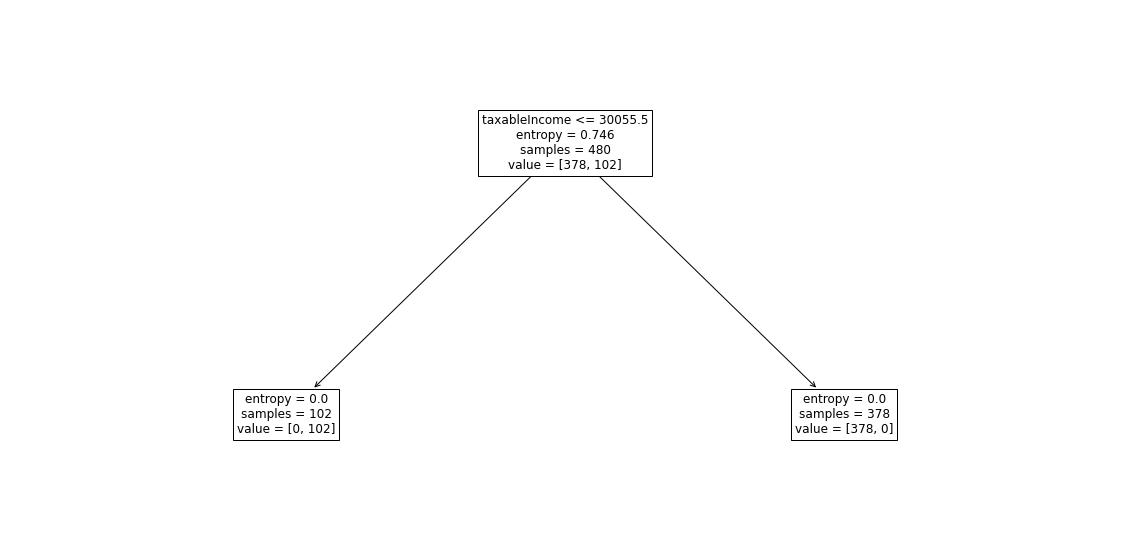

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
tree.plot_tree(model, fontsize=12, feature_names=('Undergrad', 'maritalStatus', 'taxableIncome', 'cityPopulation','workExperience', 'Urban'));

In [56]:
model.score(x_test,y_test)

1.0